In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
epoch_key = ('Roqui', 5, 2)

In [4]:
from src.parameters import ANIMALS
from src.load_data import (
    _get_pos_dataframe, make_track_graph, classify_track_segments,
    calculate_linear_distance, convert_linear_distance_to_linear_position)

position_info = _get_pos_dataframe(epoch_key, ANIMALS)

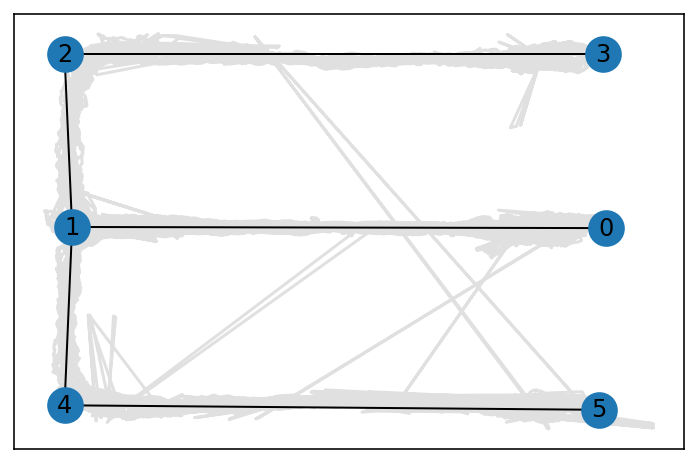

In [5]:
from loren_frank_data_processing.track_segment_classification import plot_track

track_graph, center_well_id = make_track_graph(epoch_key, ANIMALS)
position = position_info.loc[:, [
    'tailBase_x', 'tailBase_y']].values

fig, ax = plt.subplots()
plot_track(track_graph, ax=ax)
plt.plot(position[:, 0], position[:, 1], color='lightgrey', alpha=0.7, zorder=-1);

In [6]:
track_segment_id = classify_track_segments(
    track_graph, position,
    route_euclidean_distance_scaling=1E-1,
    sensor_std_dev=20)
track_segment_id = pd.DataFrame(
    track_segment_id, index=position_info.index)

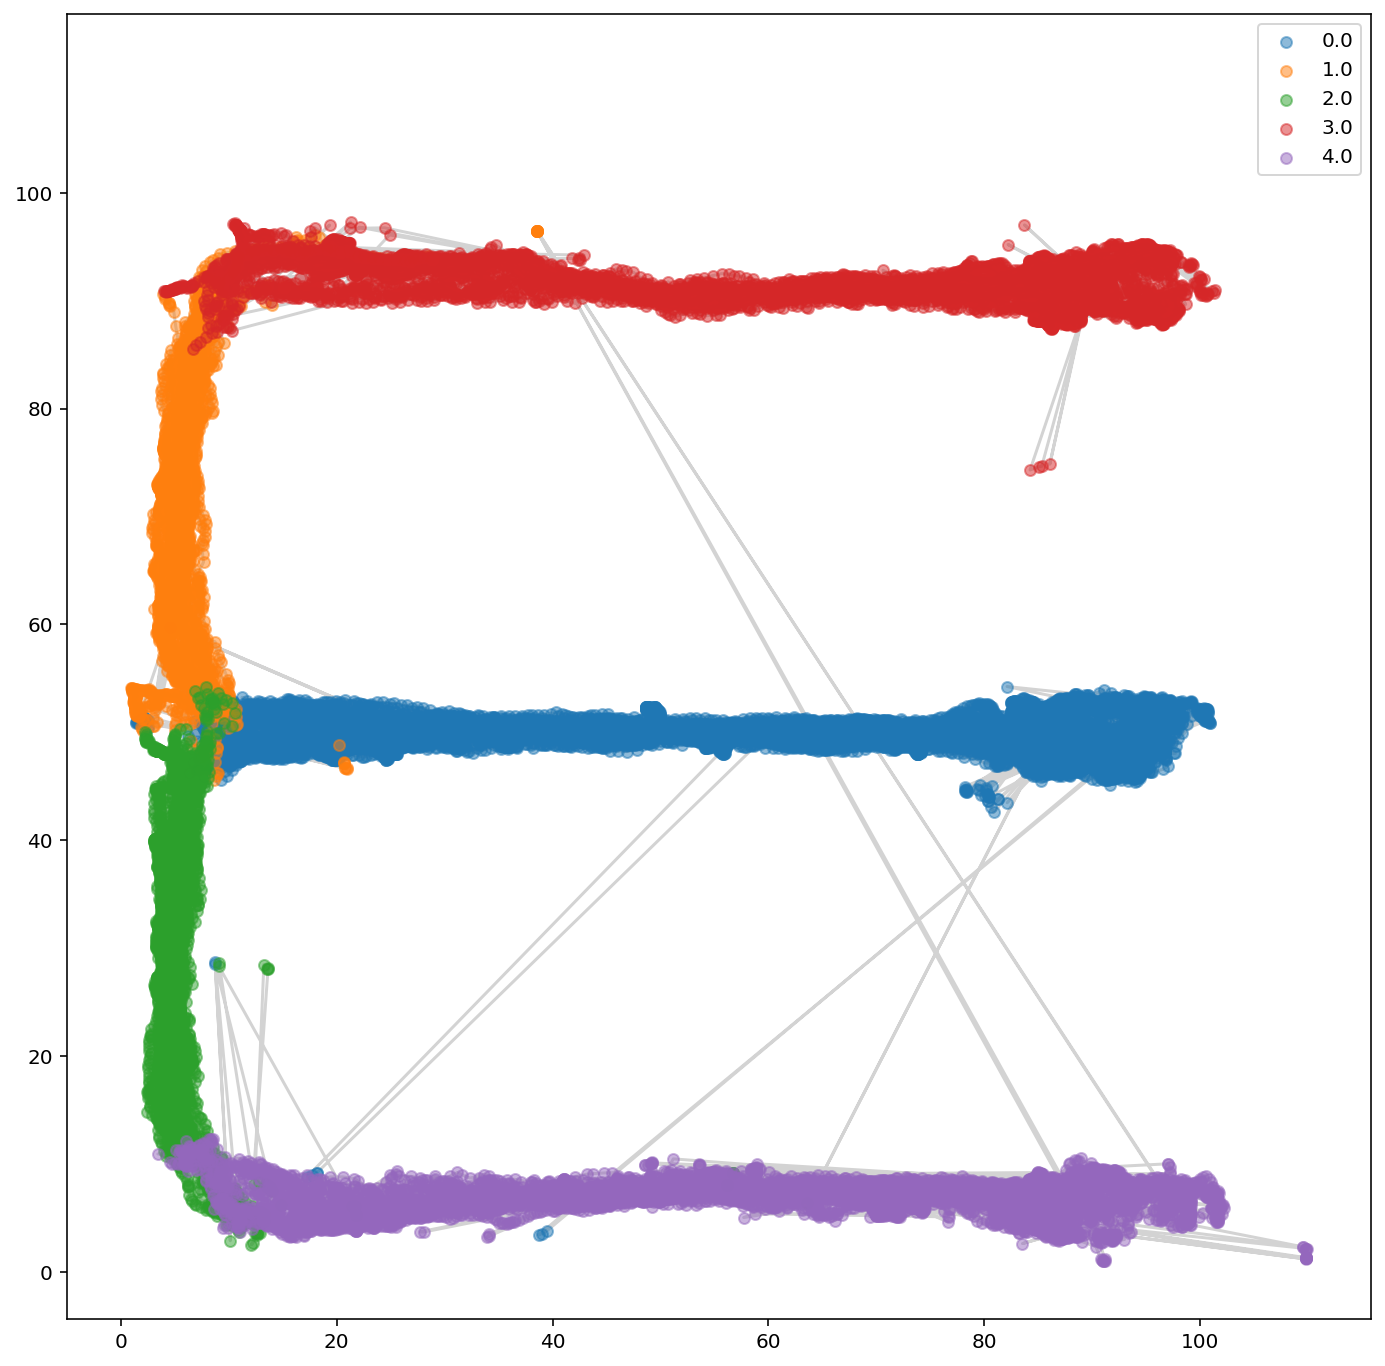

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(position[:, 0], position[:, 1], color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in position_info.groupby(track_segment_id.values.squeeze()):
    ax.scatter(df.tailBase_x, df.tailBase_y, s=30, alpha=0.5, label=edge_label)
plt.legend()
plt.axis('square');

In [8]:
position_info['linear_distance'] = calculate_linear_distance(
    track_graph, track_segment_id.values.squeeze(), center_well_id,
    position)

In [9]:
center_well_id

0

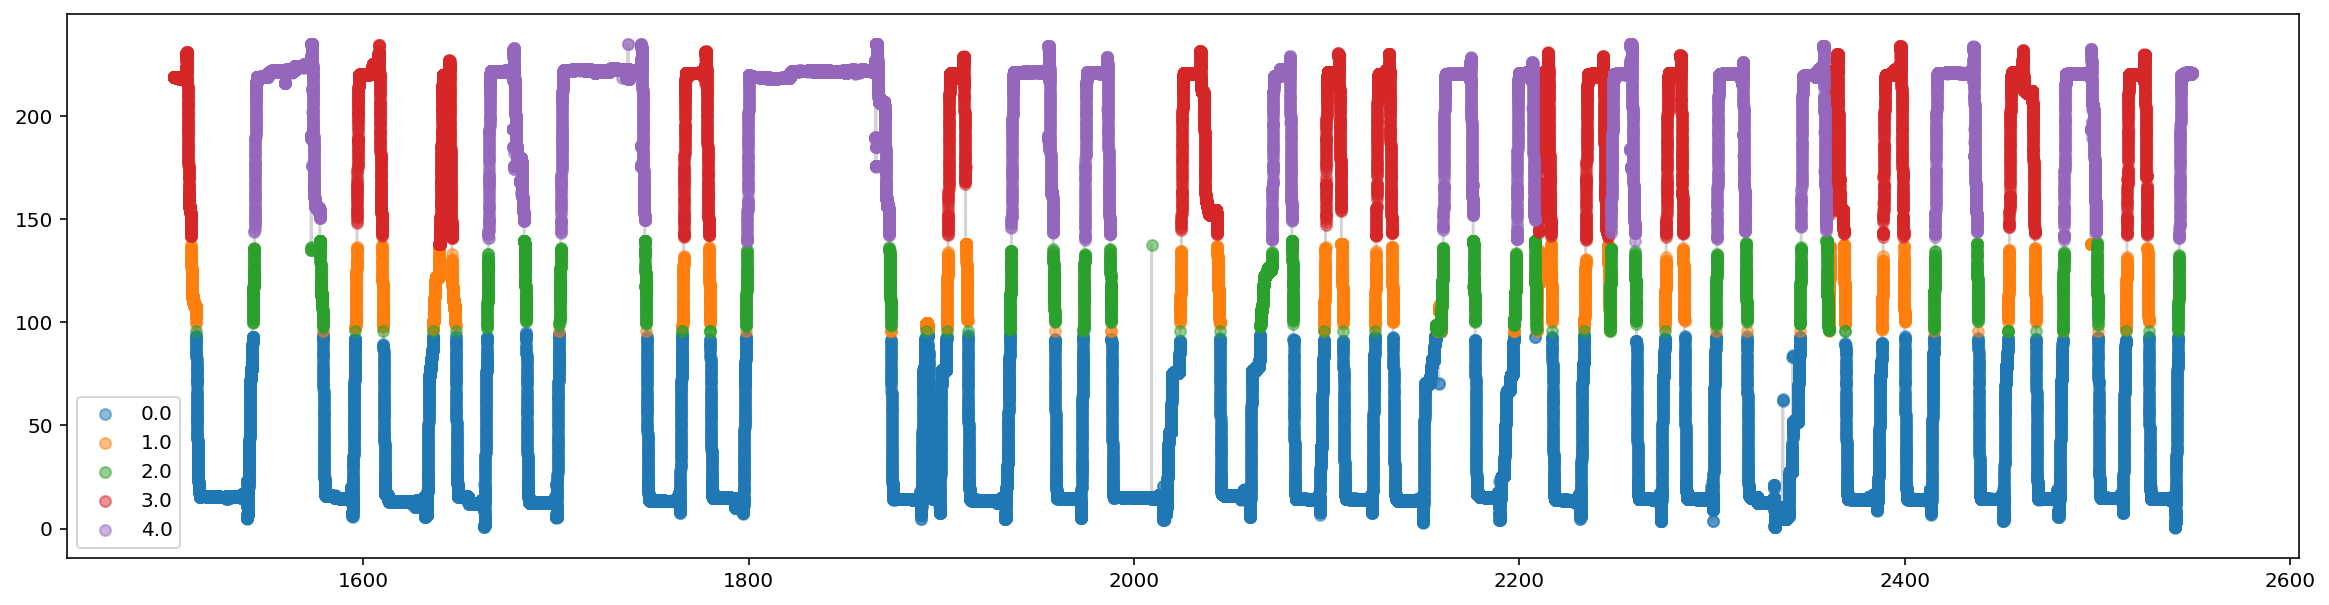

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))

time = position_info.index / np.timedelta64(1, 's')
ax.plot(time, position_info.linear_distance, color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in position_info.groupby(track_segment_id.values.squeeze()):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_distance, s=30, alpha=0.5, label=edge_label)
plt.legend()

In [11]:
EDGE_ORDER = [0, 1, 3, 2, 4]
EDGE_SPACING = [0, 0, 0, 0]

linear_position = convert_linear_distance_to_linear_position(
        position_info.linear_distance.values,
        track_segment_id.squeeze(), EDGE_ORDER,
        spacing=EDGE_SPACING)

In [12]:
linear_position = pd.DataFrame(
    linear_position, index=position_info.index)

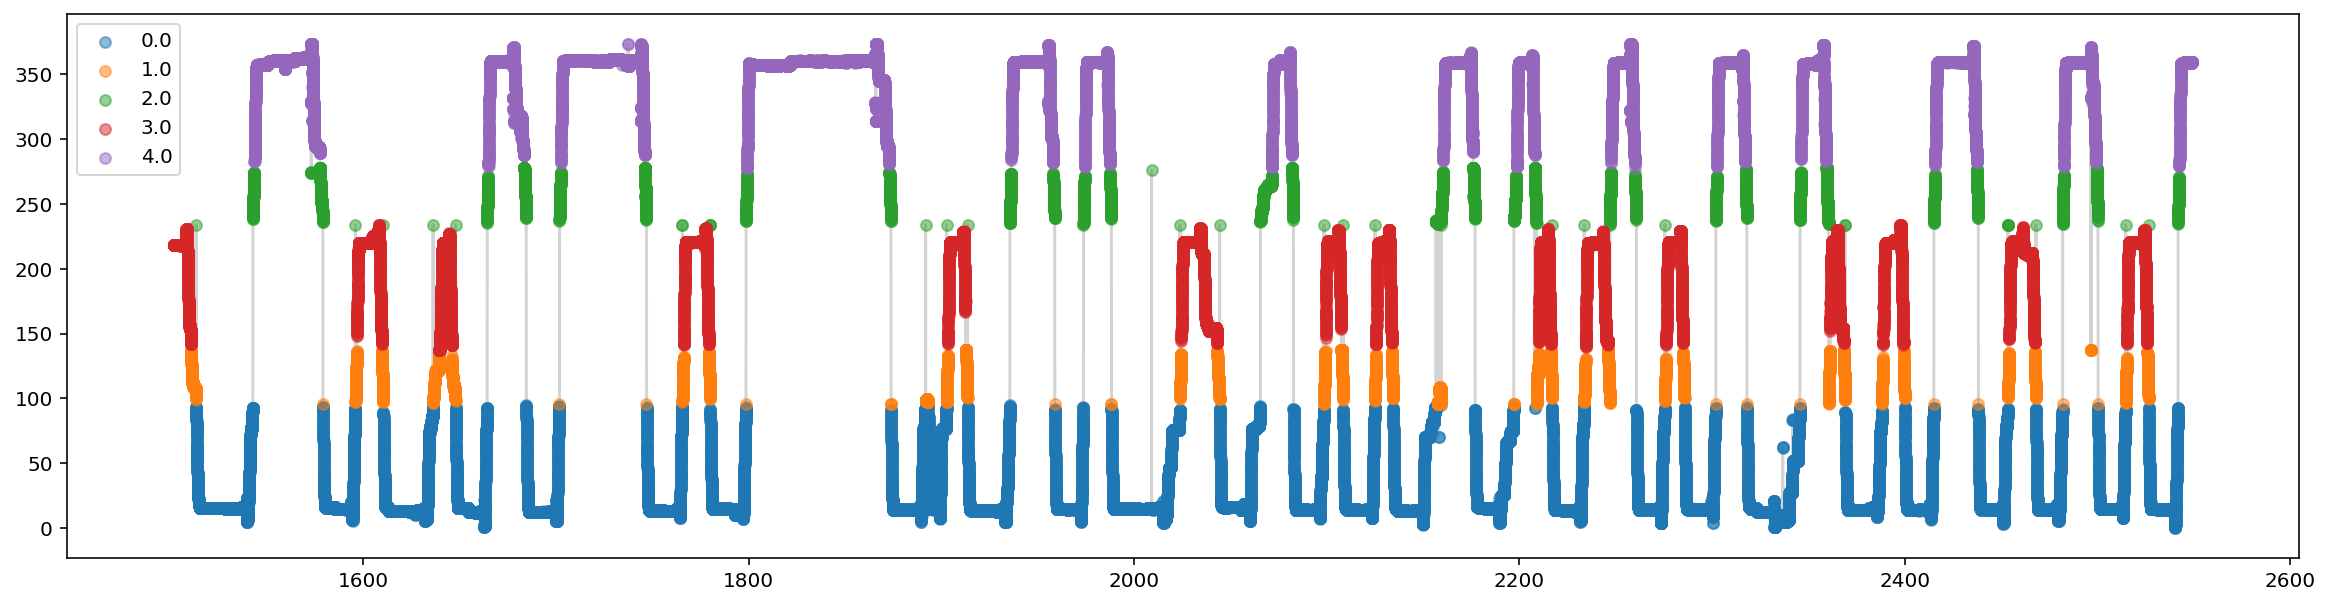

In [13]:
fig, ax = plt.subplots(figsize=(20, 5))

time = position_info.index / np.timedelta64(1, 's')
ax.plot(time, linear_position.values, color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in linear_position.groupby(track_segment_id.values.squeeze()):
    ax.scatter(df.index / np.timedelta64(1, 's'), df, s=30, alpha=0.5, label=edge_label)
plt.legend()

In [14]:
linear_position = linear_position.values

In [15]:
position_info

,nose_x,nose_y,nose_vel,tailBase_x,tailBase_y,tailBase_vel,tailMid_x,tailMid_y,tailMid_vel,tailTip_x,...,forepawR_x,forepawR_y,forepawR_vel,hindpawL_x,hindpawL_y,hindpawL_vel,hindpawR_x,hindpawR_y,hindpawR_vel,linear_distance
time,,,,,,,,,,,,,,,,,,,,,
00:25:01.474544,106.024191,90.565393,-19.466150,85.426632,92.204578,0.000772,79.207901,95.303589,0.000827,73.884647,...,102.741410,92.800039,-0.000871,91.239169,90.140545,-0.002439,89.223088,94.396685,0.000321,218.611390
00:25:01.482546,86.558041,68.374660,0.038467,85.427404,92.209643,0.000444,79.208728,95.304962,0.000226,73.885150,...,102.740539,92.797481,0.000601,91.236730,90.138683,0.003559,89.223409,94.400626,-0.068895,218.612162
00:25:01.490547,86.596508,68.264030,19.404074,85.427848,92.205733,-0.002121,79.208953,95.304935,-0.000326,73.885300,...,102.741139,92.798448,0.009206,91.240289,90.137677,-0.002356,89.154514,94.526352,0.068733,218.612606
00:25:01.498548,106.000582,90.548671,0.006947,85.425727,92.204240,0.005374,79.208627,95.303654,0.000099,73.885353,...,102.750345,92.811350,0.007716,91.237933,90.146848,-0.008337,89.223247,94.399976,0.005833,218.610485
00:25:01.506539,106.007529,90.548918,-19.356929,85.431101,92.203073,0.000386,79.208726,95.269136,-0.008247,73.980664,...,102.758061,92.807155,0.003053,91.229596,90.147391,0.008647,89.229080,94.399178,-0.000312,218.615859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:42:29.068617,85.983610,5.600384,0.006476,85.965035,6.576284,0.005653,76.700237,7.332244,0.012817,69.095103,...,102.597509,6.853667,0.004440,92.207430,3.747180,0.001217,94.631323,7.969132,-0.001767,220.511243
00:42:29.076618,85.990086,5.601234,-0.000050,85.970688,6.583890,0.000249,76.713054,7.348577,-0.000291,69.099856,...,102.601949,6.857838,0.003654,92.208648,3.750652,-0.000047,94.629556,7.961514,-0.001829,220.516808
00:42:29.084620,85.990036,5.600453,-0.001361,85.970936,6.583821,-0.011684,76.712763,7.349052,-0.005586,69.097264,...,102.605603,6.861322,0.007955,92.208601,3.751386,-0.026346,94.627727,7.961779,-0.000389,220.517058


In [16]:
position_info = position_info.resample('2ms').mean().interpolate('time')
position_info.loc[
    position_info.linear_distance < 0, 'linear_distance'] = 0.0
position_info['track_segment_id'] = (
    track_segment_id.reindex(index=position_info.index, method='pad'))

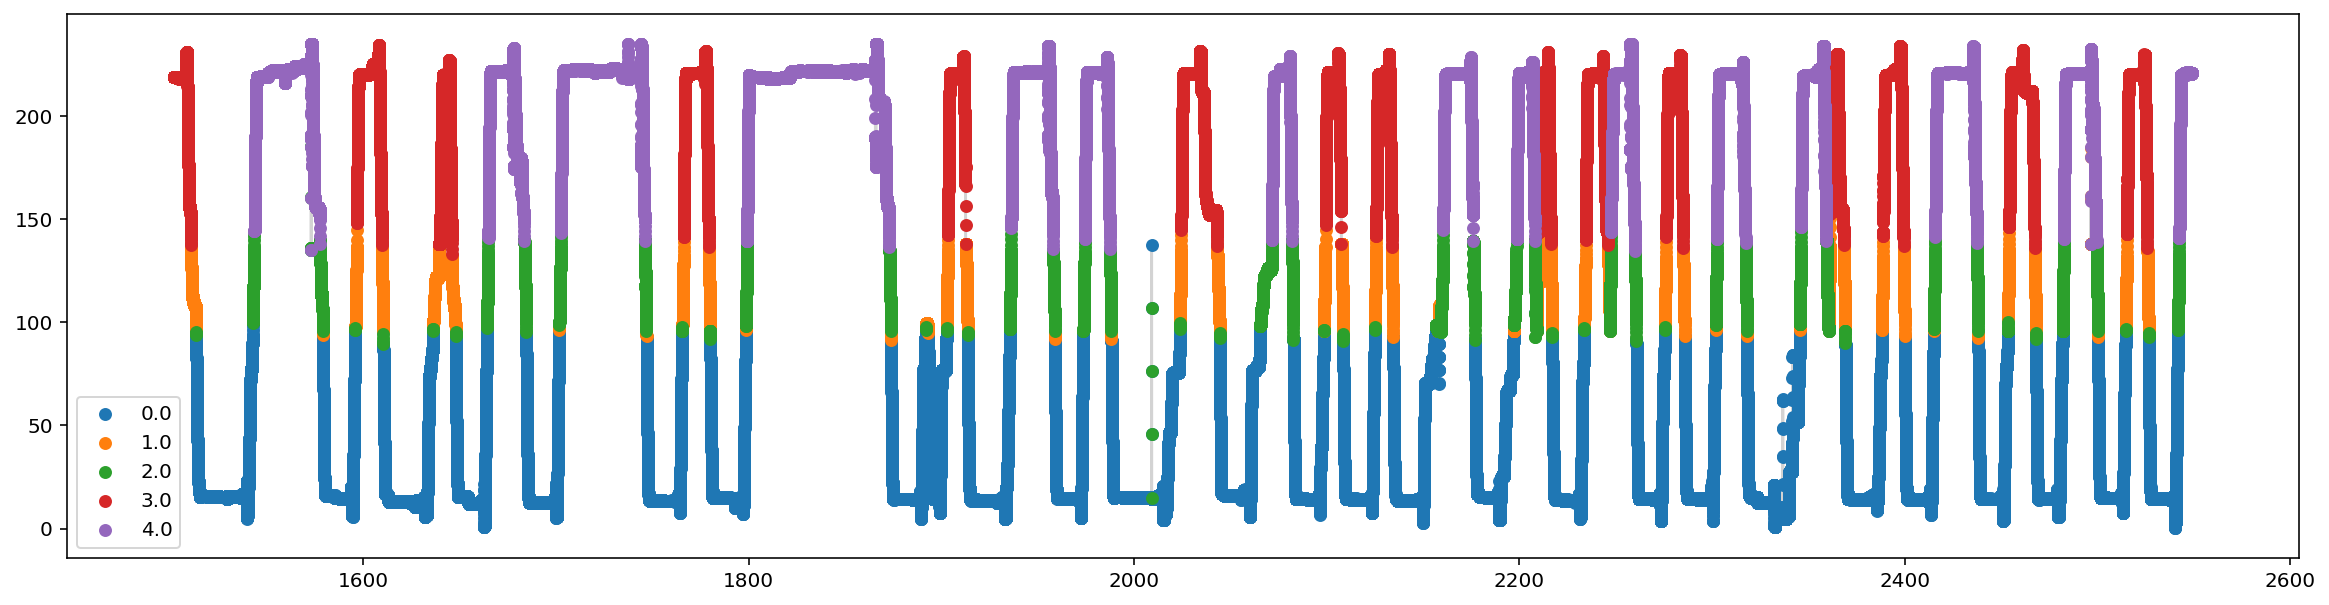

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))

time = position_info.index / np.timedelta64(1, 's')
ax.plot(time, position_info.linear_distance, color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in position_info.groupby('track_segment_id'):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_distance, s=30, label=edge_label)
plt.legend()

In [18]:
EDGE_ORDER = [0, 1, 3, 2, 4]
EDGE_SPACING = [15, 0, 15, 0]

position_info['linear_position'] = convert_linear_distance_to_linear_position(
    position_info.linear_distance.values,
    position_info.track_segment_id.values, EDGE_ORDER,
    spacing=EDGE_SPACING)

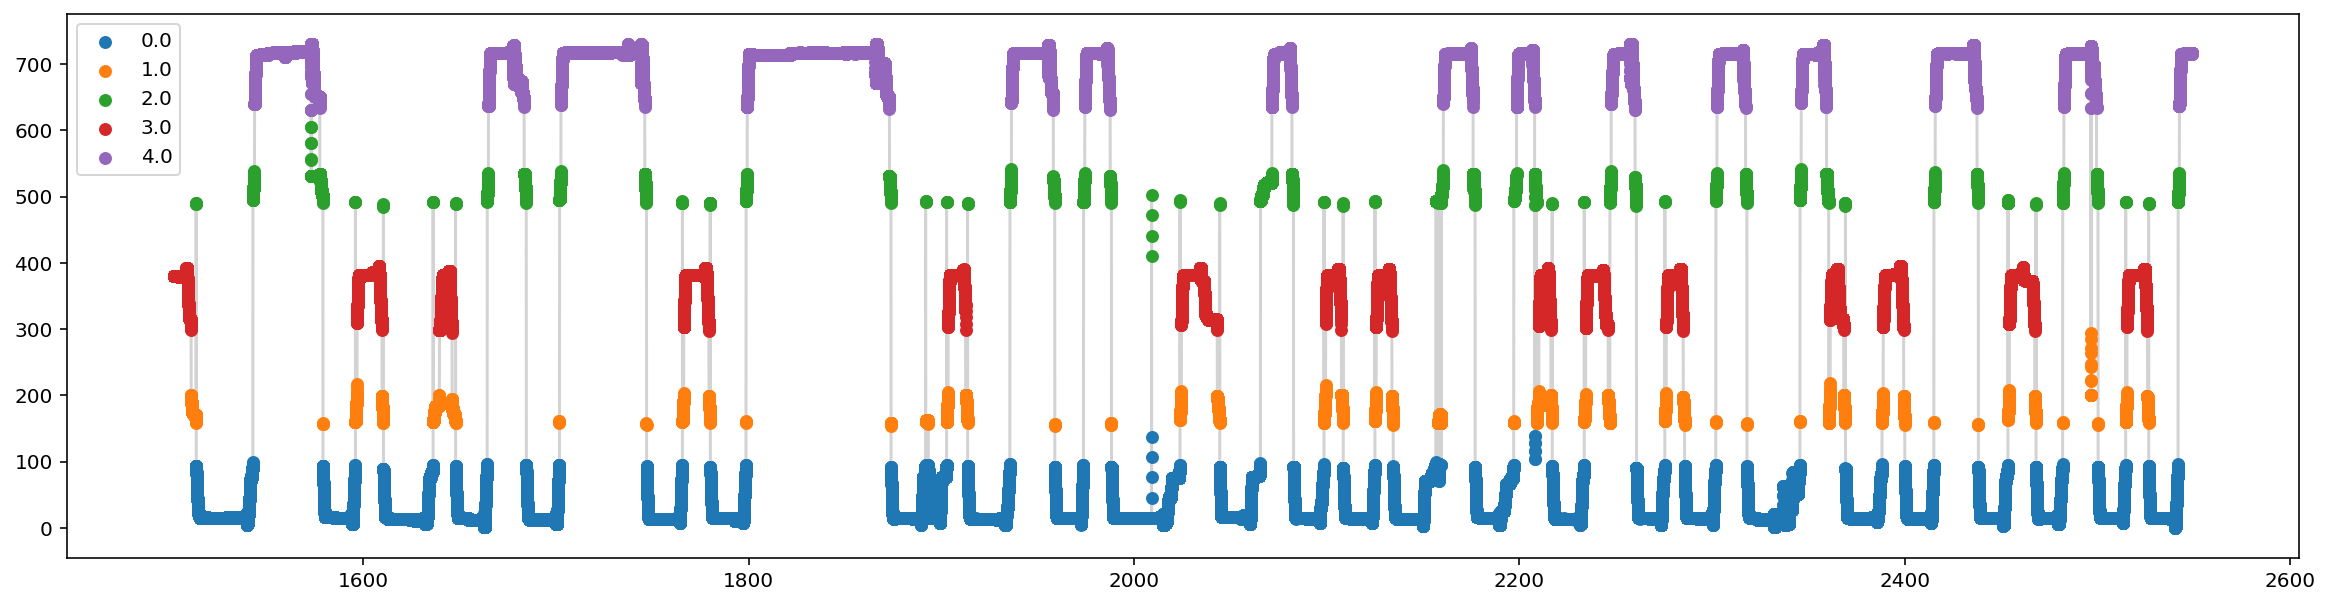

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))

time = position_info.index / np.timedelta64(1, 's')
ax.plot(time, position_info.linear_position.values, color='lightgrey', alpha=1, zorder=-1);
for edge_label, df in position_info.groupby('track_segment_id'):
    ax.scatter(df.index / np.timedelta64(1, 's'), df.linear_position, s=30, label=edge_label)
plt.legend()